In [1]:
import keras
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.layers import Dense

from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

from keras.models import Sequential, Model 
from keras.utils import np_utils
from keras.layers import  BatchNormalization,Dense, Conv2D, Convolution2D, MaxPooling2D, Dropout, Flatten, TimeDistributed, InputLayer, LSTM
from keras.layers import Input, Reshape, Activation, add, Add
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from keras import optimizers

from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

Using TensorFlow backend.


In [2]:
file=open("mindbigdata.txt","r")
data=[]

In [3]:
for line in file.readlines():
    data.append(line.replace("\t",",").split(","))

In [4]:
eeg=pd.DataFrame(data)

In [5]:
eeg=eeg.dropna(axis=1)

In [6]:
EEG=eeg.drop(eeg.columns[[0,1,2,5]],axis='columns')

In [7]:
#번호별로 data 분리
EEG_0=EEG[EEG[4].isin(['0'])]
EEG_1=EEG[EEG[4].isin(['1'])]
EEG_2=EEG[EEG[4].isin(['2'])]
EEG_3=EEG[EEG[4].isin(['3'])]
EEG_4=EEG[EEG[4].isin(['4'])]
EEG_5=EEG[EEG[4].isin(['5'])]
EEG_6=EEG[EEG[4].isin(['6'])]
EEG_7=EEG[EEG[4].isin(['7'])]
EEG_8=EEG[EEG[4].isin(['8'])]
EEG_9=EEG[EEG[4].isin(['9'])]
EEG__1=EEG[EEG[4].isin(['-1'])]

In [8]:
EEG_0=pd.DataFrame(EEG_0.values)
EEG_1=pd.DataFrame(EEG_1.values)
EEG_2=pd.DataFrame(EEG_2.values)
EEG_3=pd.DataFrame(EEG_3.values)
EEG_4=pd.DataFrame(EEG_4.values)
EEG_5=pd.DataFrame(EEG_5.values)
EEG_6=pd.DataFrame(EEG_6.values)
EEG_7=pd.DataFrame(EEG_7.values)
EEG_8=pd.DataFrame(EEG_8.values)
EEG_9=pd.DataFrame(EEG_9.values)
EEG__1=pd.DataFrame(EEG__1.values)

In [9]:
EEG_0=EEG_0.drop(EEG_0.columns[[0,1]],axis='columns')
EEG_1=EEG_1.drop(EEG_1.columns[[0,1]],axis='columns')
EEG_2=EEG_2.drop(EEG_2.columns[[0,1]],axis='columns')
EEG_3=EEG_3.drop(EEG_3.columns[[0,1]],axis='columns')
EEG_4=EEG_4.drop(EEG_4.columns[[0,1]],axis='columns')
EEG_5=EEG_5.drop(EEG_5.columns[[0,1]],axis='columns')
EEG_6=EEG_6.drop(EEG_6.columns[[0,1]],axis='columns')
EEG_7=EEG_7.drop(EEG_7.columns[[0,1]],axis='columns')
EEG_8=EEG_8.drop(EEG_8.columns[[0,1]],axis='columns')
EEG_9=EEG_9.drop(EEG_9.columns[[0,1]],axis='columns')
EEG__1=EEG__1.drop(EEG__1.columns[[0,1]],axis='columns')

In [10]:
eeg_0=EEG_0.values
eeg_1=EEG_1.values
eeg_2=EEG_2.values
eeg_3=EEG_3.values
eeg_4=EEG_4.values
eeg_5=EEG_5.values
eeg_6=EEG_6.values
eeg_7=EEG_7.values
eeg_8=EEG_8.values
eeg_9=EEG_9.values
eeg__1=EEG__1.values

In [11]:
scaler=MinMaxScaler()
eeg_0[:]=scaler.fit_transform(eeg_0[:])*255
eeg_1[:]=scaler.fit_transform(eeg_1[:])*255
eeg_2[:]=scaler.fit_transform(eeg_2[:])*255
eeg_3[:]=scaler.fit_transform(eeg_3[:])*255
eeg_4[:]=scaler.fit_transform(eeg_4[:])*255
eeg_5[:]=scaler.fit_transform(eeg_5[:])*255
eeg_6[:]=scaler.fit_transform(eeg_6[:])*255
eeg_7[:]=scaler.fit_transform(eeg_7[:])*255
eeg_8[:]=scaler.fit_transform(eeg_8[:])*255
eeg_9[:]=scaler.fit_transform(eeg_9[:])*255
eeg__1[:]=scaler.fit_transform(eeg__1[:])*255

In [12]:
def reshapeLinearData(eeg):
    data=[]
    data=np.r_[eeg[0],eeg[1]]
    for i in range(2,len(eeg)):
        data=np.r_[data,eeg[i]]
    return data

def convertT(eeg) :
    data=[]
    for i in range(len(eeg)) :
        data.append(eeg[i].T)
    data=np.asarray(data)
    return data

In [13]:
data_0=eeg_0.reshape(-1,14,136)
data_1=eeg_1.reshape(-1,14,136)
data_2=eeg_2.reshape(-1,14,136)
data_3=eeg_3.reshape(-1,14,136)
data_4=eeg_4.reshape(-1,14,136)
data_5=eeg_5.reshape(-1,14,136)
data_6=eeg_6.reshape(-1,14,136)
data_7=eeg_7.reshape(-1,14,136)
data_8=eeg_8.reshape(-1,14,136)
data_9=eeg_9.reshape(-1,14,136)
data__1=eeg__1.reshape(-1,14,136)

In [14]:
eeg_0=convertT(data_0)
eeg_1=convertT(data_1)
eeg_2=convertT(data_2)
eeg_3=convertT(data_3)
eeg_4=convertT(data_4)
eeg_5=convertT(data_5)
eeg_6=convertT(data_6)
eeg_7=convertT(data_7)
eeg_8=convertT(data_8)
eeg_9=convertT(data_9)
eeg__1=convertT(data__1)

In [15]:
eeg_0=reshapeLinearData(eeg_0)
print("finish")
eeg_1=reshapeLinearData(eeg_1)
print("finish")
eeg_2=reshapeLinearData(eeg_2)
print("finish")
eeg_3=reshapeLinearData(eeg_3)
print("finish")
eeg_4=reshapeLinearData(eeg_4)
print("finish")
eeg_5=reshapeLinearData(eeg_5)
print("finish")
eeg_6=reshapeLinearData(eeg_6)
print("finish")
eeg_7=reshapeLinearData(eeg_7)
print("finish")
eeg_8=reshapeLinearData(eeg_8)
print("finish")
eeg_9=reshapeLinearData(eeg_9)
print("finish")
eeg__1=reshapeLinearData(eeg__1)

finish
finish
finish
finish
finish
finish
finish
finish
finish
finish


In [16]:
print(eeg_0.shape,eeg_1.shape,eeg_2.shape,eeg_3.shape,eeg_4.shape,eeg_5.shape,eeg_6.shape,eeg_7.shape,eeg_8.shape,eeg_9.shape,eeg__1.shape)

(886176, 14) (863736, 14) (883320, 14) (900048, 14) (863464, 14) (893656, 14) (887128, 14) (861832, 14) (891072, 14) (892568, 14) (21624, 14)


In [17]:
label_0=np.zeros((len(eeg_0),1))
label_1=np.ones((len(eeg_1),1))
label_2=np.full((len(eeg_2),1),2)
label_3=np.full((len(eeg_3),1),2)
label_4=np.full((len(eeg_4),1),2)
label_5=np.full((len(eeg_5),1),2)
label_6=np.full((len(eeg_6),1),2)
label_7=np.full((len(eeg_7),1),2)
label_8=np.full((len(eeg_8),1),2)
label_9=np.full((len(eeg_9),1),2)
label__1=np.full((len(eeg__1),1),-1)

In [18]:
data=np.r_[eeg_0,eeg_1]
data=np.r_[data,eeg_2]
data=np.r_[data,eeg_3]
data=np.r_[data,eeg_4]
data=np.r_[data,eeg_5]
data=np.r_[data,eeg_6]
data=np.r_[data,eeg_7]
data=np.r_[data,eeg_8]
data=np.r_[data,eeg_9]
data=np.r_[data,eeg__1]
print(data.shape)

(8844624, 14)


In [19]:
label=np.r_[label_0,label_1]
label=np.r_[label,label_2]
label=np.r_[label,label_3]
label=np.r_[label,label_4]
label=np.r_[label,label_5]
label=np.r_[label,label_6]
label=np.r_[label,label_7]
label=np.r_[label,label_8]
label=np.r_[label,label_9]
label=np.r_[label,label__1]
print(label.shape)

(8844624, 1)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=None, shuffle=True, stratify=label)

In [21]:
y_train = to_categorical(y_train, 11)
y_test = to_categorical(y_test, 11)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6191236, 14) (2653388, 14) (6191236, 11) (2653388, 11)


In [22]:
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [24]:
def model_create(eeg_data):
    eeg_input=Input(shape=(14,)) #입력 정의
    
    eeg_output = Dense(50, activation='relu')(eeg_input)
    eeg_output = Dropout(0.5)(eeg_output)
    eeg_output = Dense(150, activation='relu')(eeg_input)
    eeg_output = Dropout(0.5)(eeg_output)
    eeg_output = Dense(150, activation='relu')(eeg_input)
    eeg_output = Dropout(0.5)(eeg_output)
    eeg_output = Dense(200, activation='relu')(eeg_output)
    
    model = Dense(11, activation='sigmoid')(eeg_output)
    
    model = keras.models.Model(inputs=eeg_input, outputs=model) 
    
    model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy', precision, recall, f1score])
    
    return model 

model=model_create(data)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 14)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               2250      
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               30200     
_________________________________________________________________
dense_5 (Dense)              (None, 11)                2211      
Total params: 34,661
Trainable params: 34,661
Non-trainable params: 0
_________________________________________________________________


In [36]:
#X_train = X_train.reshape(X_train.shape+ (1,))
#X_test = X_test.reshape(X_test.shape + (1,))

def lstm_model():
    model = Sequential()
    model.add(LSTM(50, input_shape = (14,1), return_sequences = True))
    model.add(LSTM(11, return_sequences = False))
    model.add(Activation('sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

model = lstm_model()

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 14, 50)            10400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 11)                2728      
_________________________________________________________________
activation_3 (Activation)    (None, 11)                0         
Total params: 13,128
Trainable params: 13,128
Non-trainable params: 0
_________________________________________________________________


In [38]:
hist=model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test,y_test))

Train on 6191236 samples, validate on 2653388 samples
Epoch 1/20
3791260/6191236 [=================>............] - ETA: 1:13:06 - loss: 0.3494 - accuracy: 0.9651

KeyboardInterrupt: 

NameError: name 'hist' is not defined

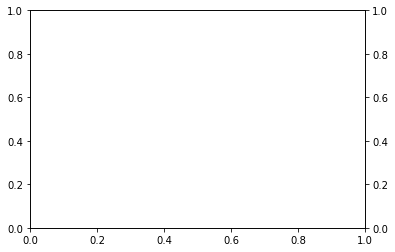

In [28]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

#results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results)

_loss, _acc, _precision, _recall, _f1score = model.evaluate(X_test, y_test)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))

In [ ]:
fig, rec_ax = plt.subplots()

pre_ax = rec_ax.twinx()

rec_ax.plot(hist.history['recall'], 'y', label='train recall')
rec_ax.plot(hist.history['val_recall'], 'r', label='val recall')

pre_ax.plot(hist.history['precision'], 'b', label='train precision')
pre_ax.plot(hist.history['val_precision'], 'g', label='val precision')

rec_ax.set_xlabel('epoch')
rec_ax.set_ylabel('recall')
pre_ax.set_ylabel('precision')

rec_ax.legend(loc='upper left')
pre_ax.legend(loc='lower left')

plt.show()